In [8]:
import numpy as np
import pandas as pd

# importer
df = pd.read_csv("../data/cleaned_data.csv")

# removing bedrooms, liv_room_surf, frontages, bathrooms, id, basement,elevator,
# surroundings,flood_zone,heating, showers, toilets, furnished, energy_class, heating,flood_zone
df = df.drop(
    columns=[
        "kitchen_type",
        "status_build",
        "bedrooms",
        "liv_room_surf",
        "frontages",
        "bathrooms",
        "id",
        "basement",
        "elevator",
        "surroundings",
        "flood_zone",
        "heating",
        "showers",
        "toilets",
        "furnished",
        "heating",
        "flood_zone",
    ]
)

# dropna living_area, price
df = df.dropna(subset=["living_area", "price"])

# replace swimming_pool None with 0
df["swimming_pool"] = df["swimming_pool"].fillna(0)


print(df.isnull().sum())
print(df)

building_type       0
building_subtype    0
price               0
living_area         0
terrace             0
garden              0
swimming_pool       0
energy_class        0
zipcode             0
municipality        0
province            0
dtype: int64
     building_type building_subtype     price  living_area  terrace  garden   
0        apartment        apartment  730000.0        212.0      0.0     0.0  \
1        apartment             loft  775000.0        258.0      0.0     0.0   
2        apartment        apartment   99000.0         94.0      0.0     0.0   
3        apartment        apartment  730000.0        212.0      0.0     0.0   
4        apartment        apartment  219000.0        111.0      0.0   200.0   
...            ...              ...       ...          ...      ...     ...   
9335         house            house  427000.0        180.0     40.0     0.0   
9336         house            house  495000.0        130.0      0.0     0.0   
9337         house            hous

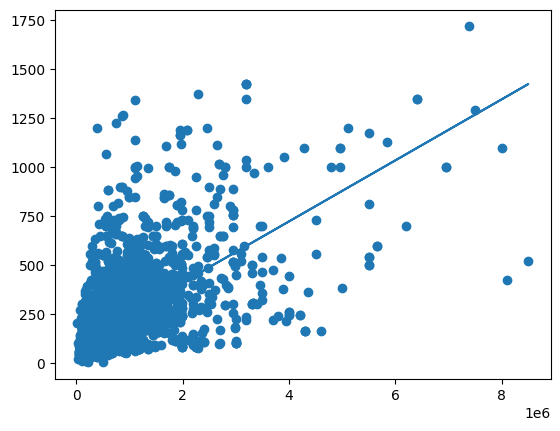

0.6225038829198734


In [9]:
import matplotlib.pyplot as plt
from scipy import stats

x = df["price"]
y = df["living_area"]
# df = df.mask(np.abs(stats.zscore(df)) < 20000)
slope, intercept, r, p, std_err = stats.linregress(x, y)


def myfunc(x):
    return slope * x + intercept


mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

print(r)